## Introduction 

In this study we are using Python 3 environment to create a machine learning model and to predict the Car Price by considering different features like Car Name, fuel type, horse power, engine type etc.

## Import the Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load The Dataset 

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')

## Understanding the Data 

In [3]:
df.shape

(205, 26)

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
col=df.columns
for i in col:
    print(f'{i}:- {df[i].unique()}')

car_ID:- [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
symboling:- [ 3  1  2  0 -1 -2]
CarName:- ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 

Lets find the correlation between continuous variables

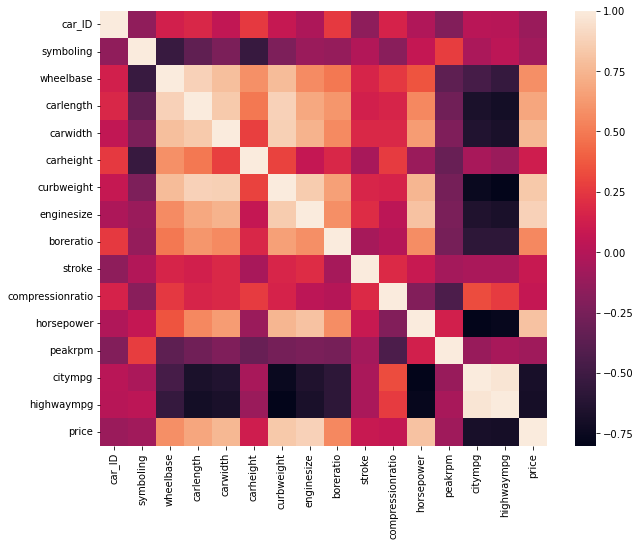

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr());

As columns ('car_ID', 'symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg') shown negative correlation with the depndent variable ('Price), they are droped from the dataframe.

In [8]:
df.drop(columns=['car_ID','symboling','carheight','stroke','compressionratio','peakrpm','citympg','highwaympg'],inplace=True)
df.shape

(205, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarName         205 non-null    object 
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   doornumber      205 non-null    object 
 4   carbody         205 non-null    object 
 5   drivewheel      205 non-null    object 
 6   enginelocation  205 non-null    object 
 7   wheelbase       205 non-null    float64
 8   carlength       205 non-null    float64
 9   carwidth        205 non-null    float64
 10  curbweight      205 non-null    int64  
 11  enginetype      205 non-null    object 
 12  cylindernumber  205 non-null    object 
 13  enginesize      205 non-null    int64  
 14  fuelsystem      205 non-null    object 
 15  boreratio       205 non-null    float64
 16  horsepower      205 non-null    int64  
 17  price           205 non-null    flo

**Car Name:-**

In car name I have taken comapny name only. 

In [10]:
company=df['CarName'].apply(lambda x : x.split(' ')[0])
company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
mistake=['maxda','Nissan','porcshce','toyouta','vokswagen','vw']
correction=['mazda','nissan','porsche','toyota','volkswagen','volkswagen']
for i in range(len(mistake)):
    company = company.replace(mistake[i], correction[i])
company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
df.insert(1,'company',company)
df.head()

,CarName,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price
0,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,13495.0
1,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,16500.0
2,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,16500.0
3,audi 100 ls,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,13950.0
4,audi 100ls,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,17450.0


In [13]:
df.drop(columns='CarName',inplace=True)
df

,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,2952,ohc,four,141,mpfi,3.78,114,16845.0
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,3049,ohc,four,141,mpfi,3.78,160,19045.0
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,134,21485.0
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,3217,ohc,six,145,idi,3.01,106,22470.0


The newly formed company column is added in the dataframe and CarName column is removed from the dataset.

In [14]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [15]:
df.replace({'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8},inplace=True)

The number of cylinders value is converted into numeric value.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         205 non-null    object 
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   doornumber      205 non-null    int64  
 4   carbody         205 non-null    object 
 5   drivewheel      205 non-null    object 
 6   enginelocation  205 non-null    object 
 7   wheelbase       205 non-null    float64
 8   carlength       205 non-null    float64
 9   carwidth        205 non-null    float64
 10  curbweight      205 non-null    int64  
 11  enginetype      205 non-null    object 
 12  cylindernumber  205 non-null    int64  
 13  enginesize      205 non-null    int64  
 14  fuelsystem      205 non-null    object 
 15  boreratio       205 non-null    float64
 16  horsepower      205 non-null    int64  
 17  price           205 non-null    flo

## Exploratory Data Analysis

**Categorical Data Visualization:-**

In [17]:
cat_col=df.select_dtypes(include=['object']).columns
cat_col

Index(['company', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')

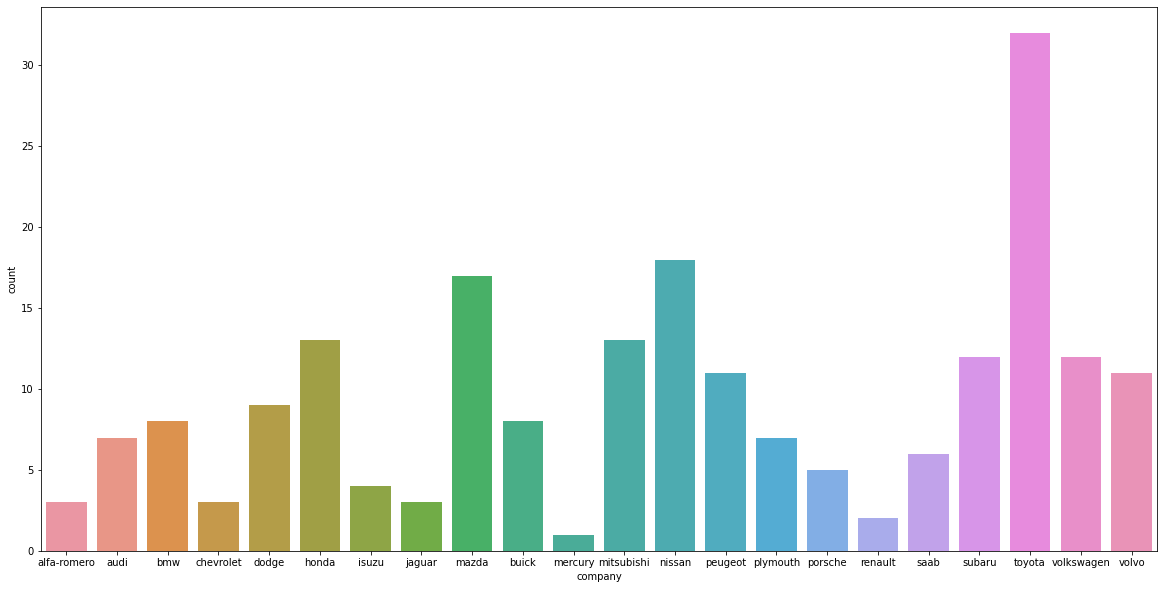

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(df['company']);

Dataset contains more number of Totota cars.

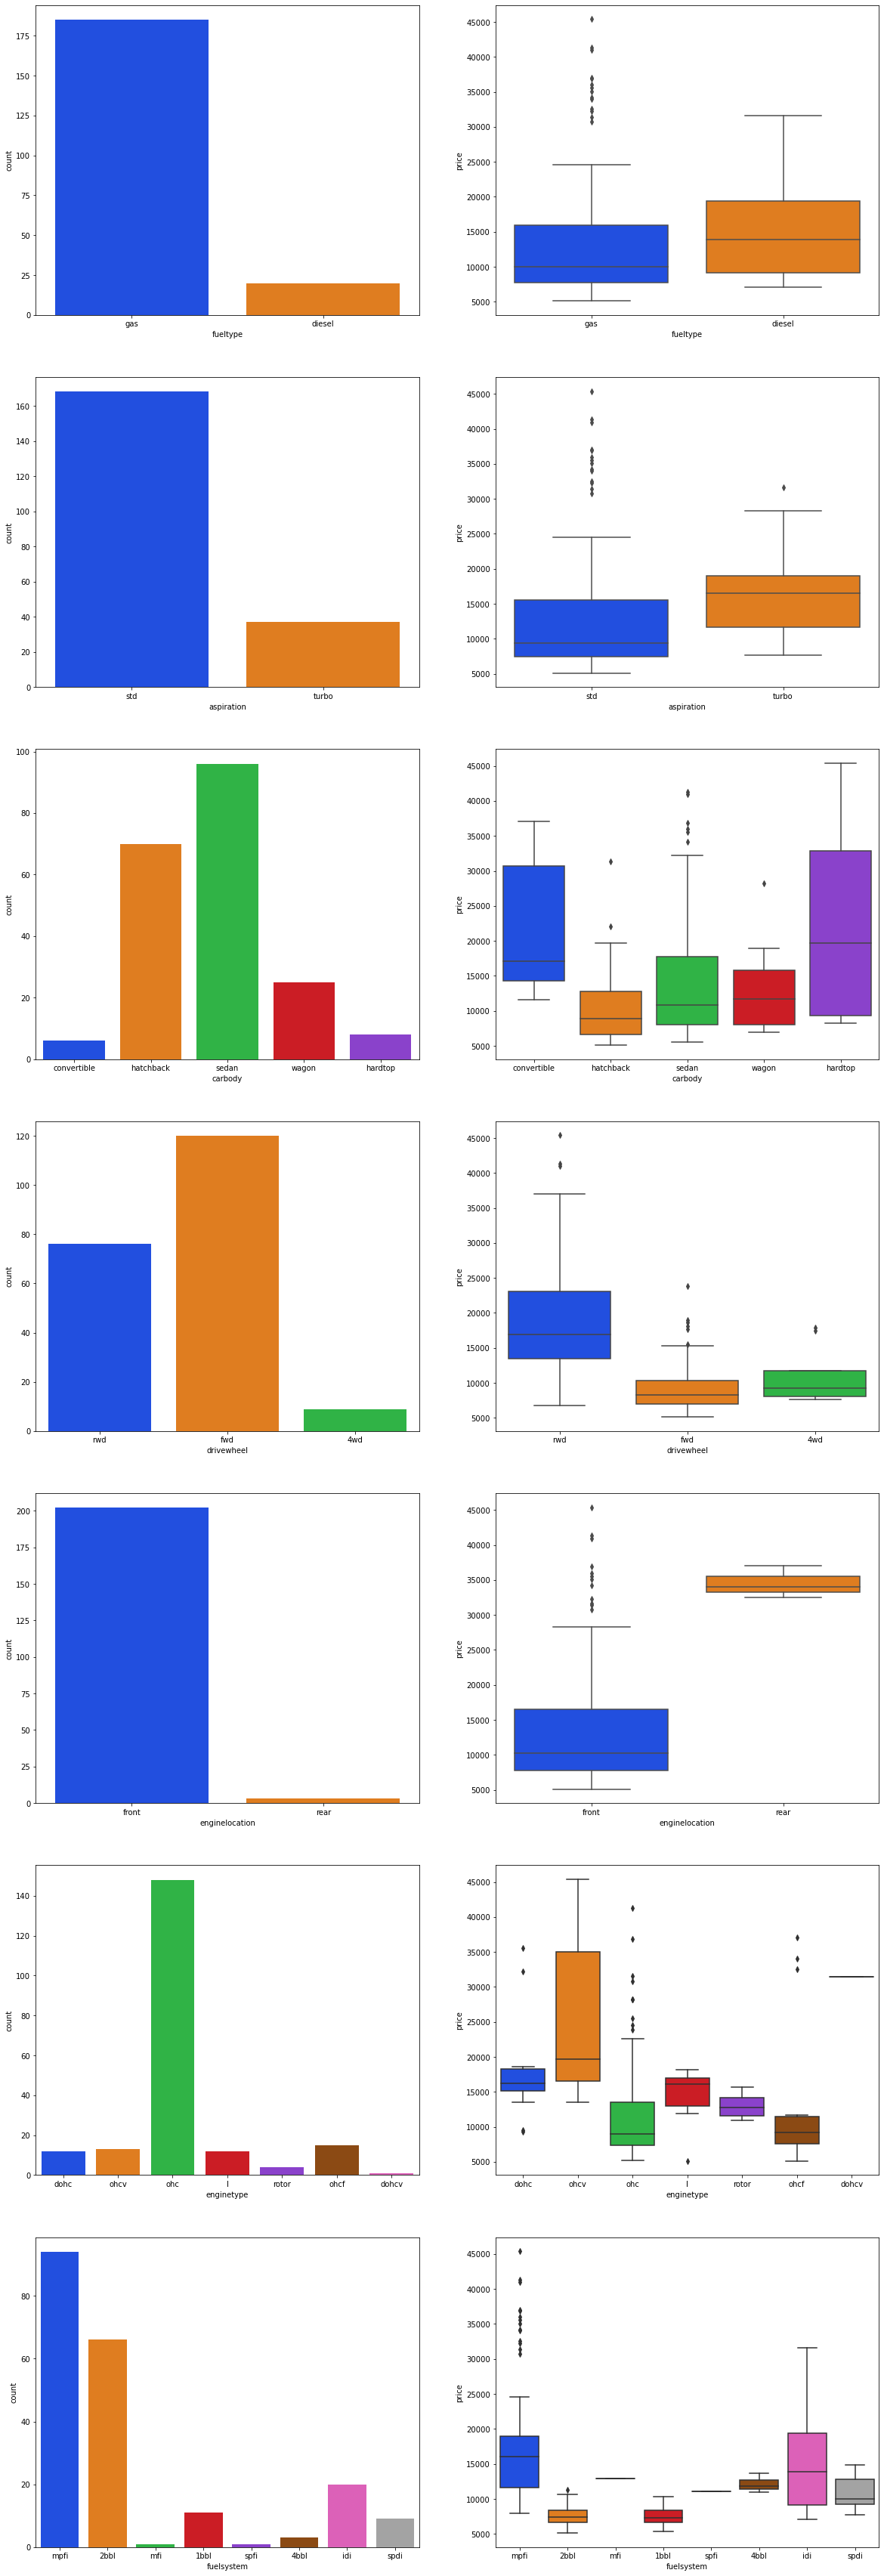

In [19]:
plt.figure(figsize=(20,80))
i=1
j=1
while i <= 18 and j<len(cat_col):
    plt.subplot(9,2,i)
    sns.countplot(df[cat_col[j]],palette="bright")
    plt.subplot(9,2,i+1)
    sns.boxplot(x=df[cat_col[j]], y=df["price"],palette="bright")
    i=i+2
    j=j+1


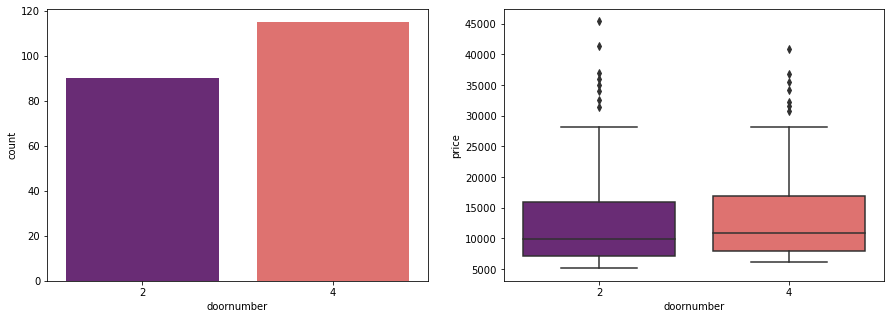

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['doornumber'],palette="magma")

plt.subplot(1,2,2)
sns.boxplot(x=df['doornumber'],y=df["price"],palette="magma");

From the above Count plot and Box plot of door number data, we can say that their is no any effect of number of doors on Price of the car. Hence better to drop this column.

In [21]:
df.drop(columns='doornumber',inplace=True)

**Numerical Data Visualization:-**

In [22]:
num_col=df.select_dtypes(include=['int64', 'float64']).columns
num_col

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'horsepower', 'price'],
      dtype='object')

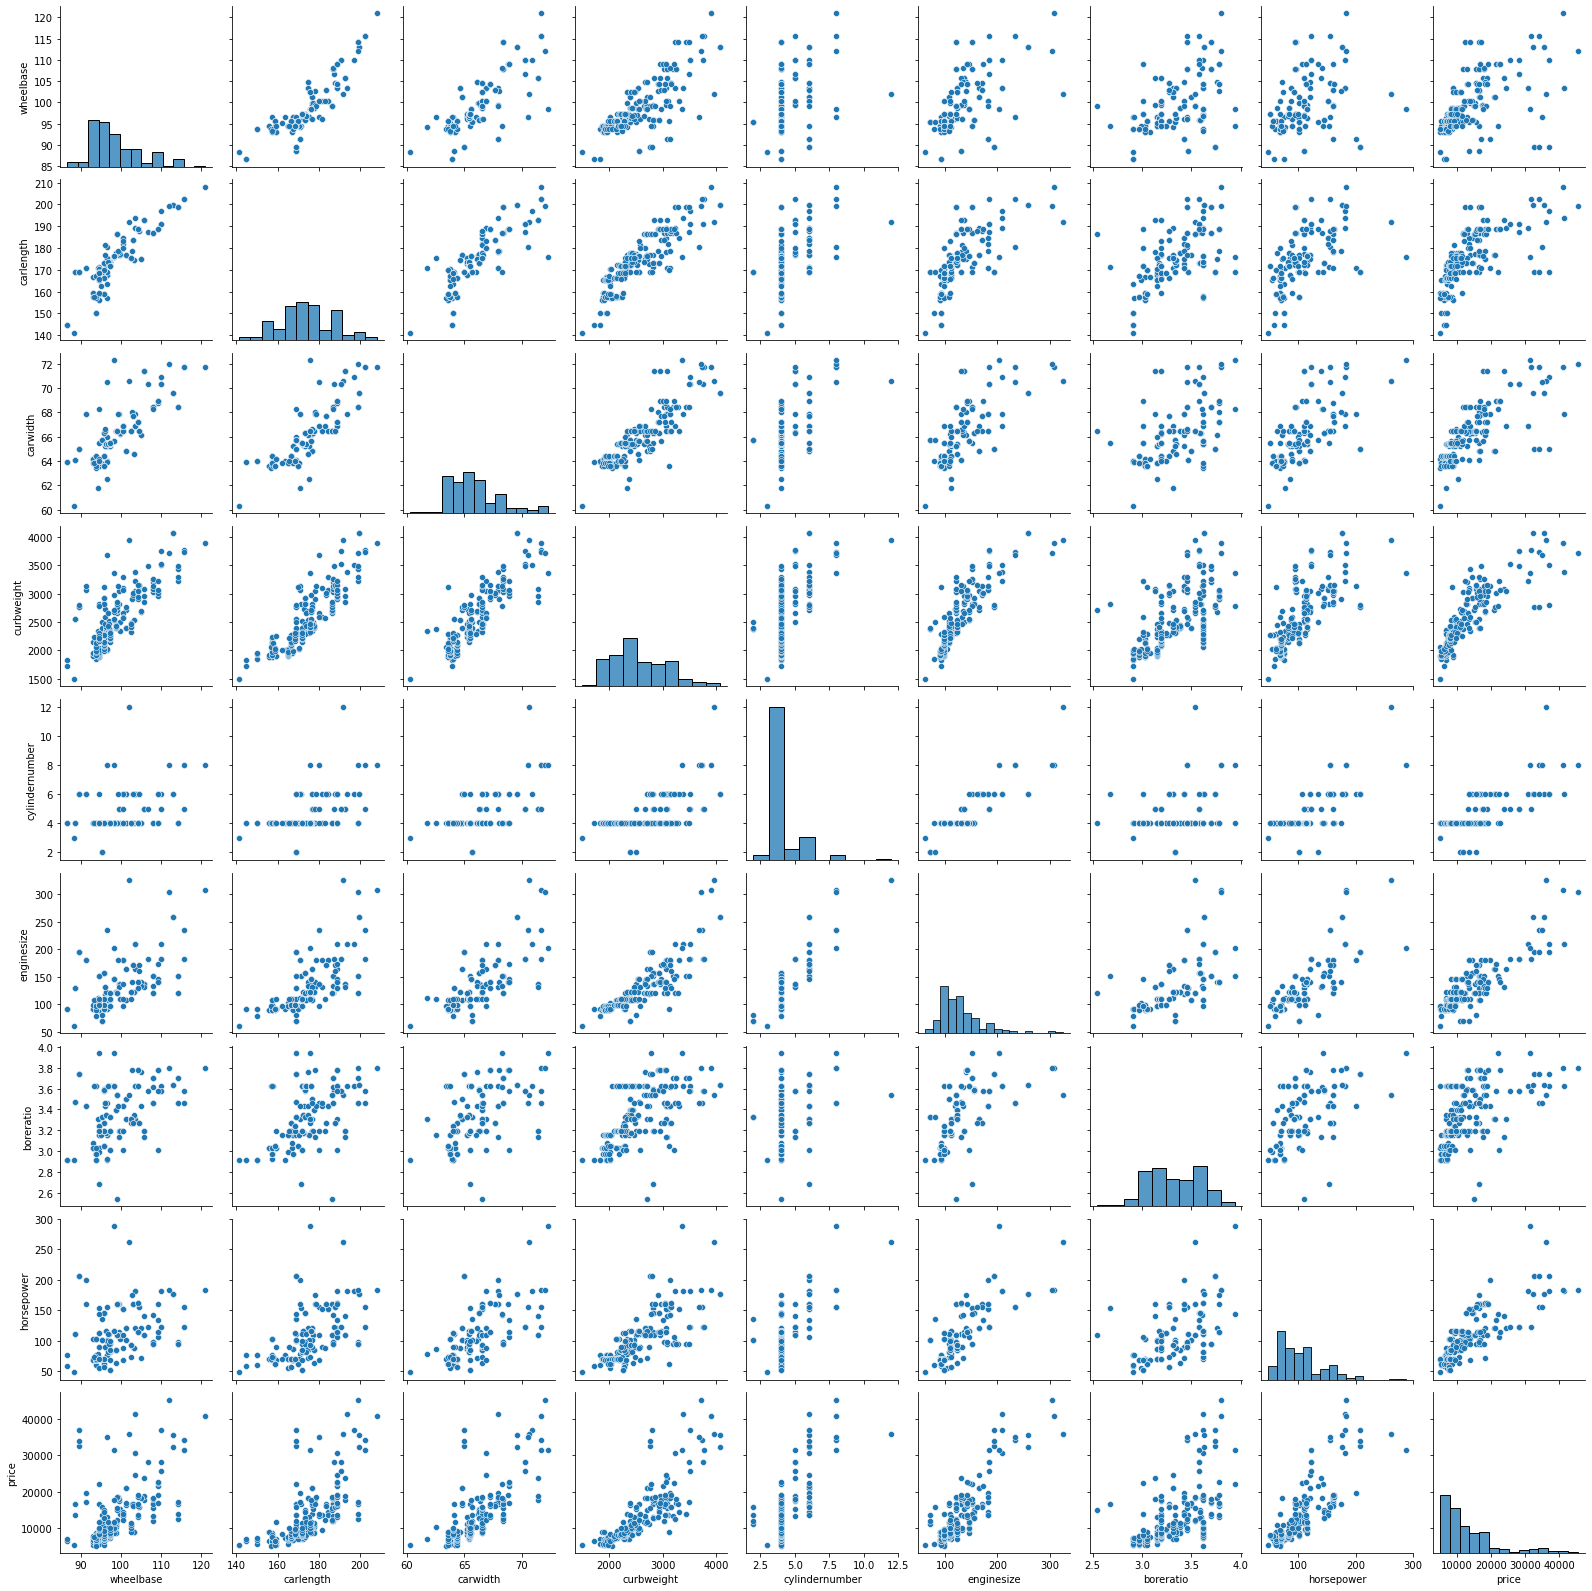

In [23]:
sns.pairplot(df[num_col]);

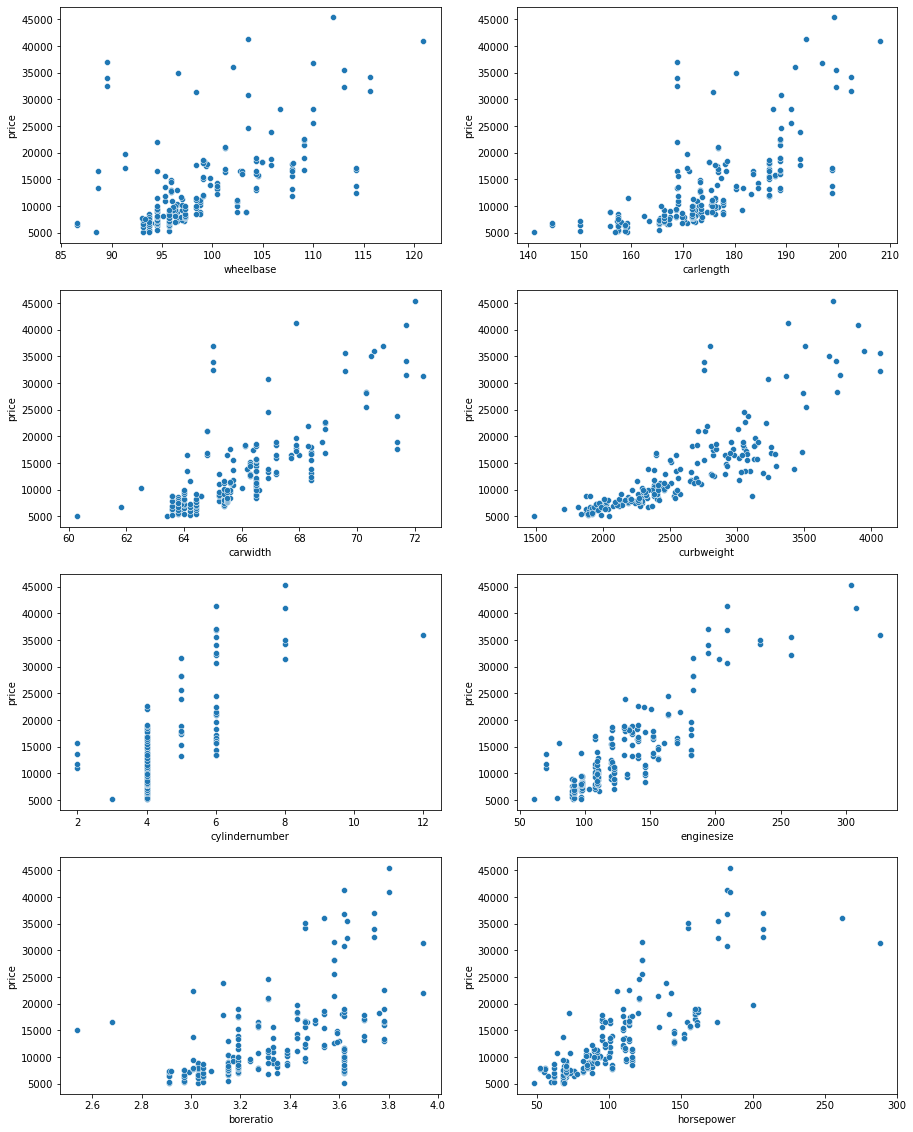

In [24]:
plt.figure(figsize=(15,20))
for i in range(len(num_col)-1):
    plt.subplot(4,2,i+1)
    sns.scatterplot(x=num_col[i], y='price', data=df)


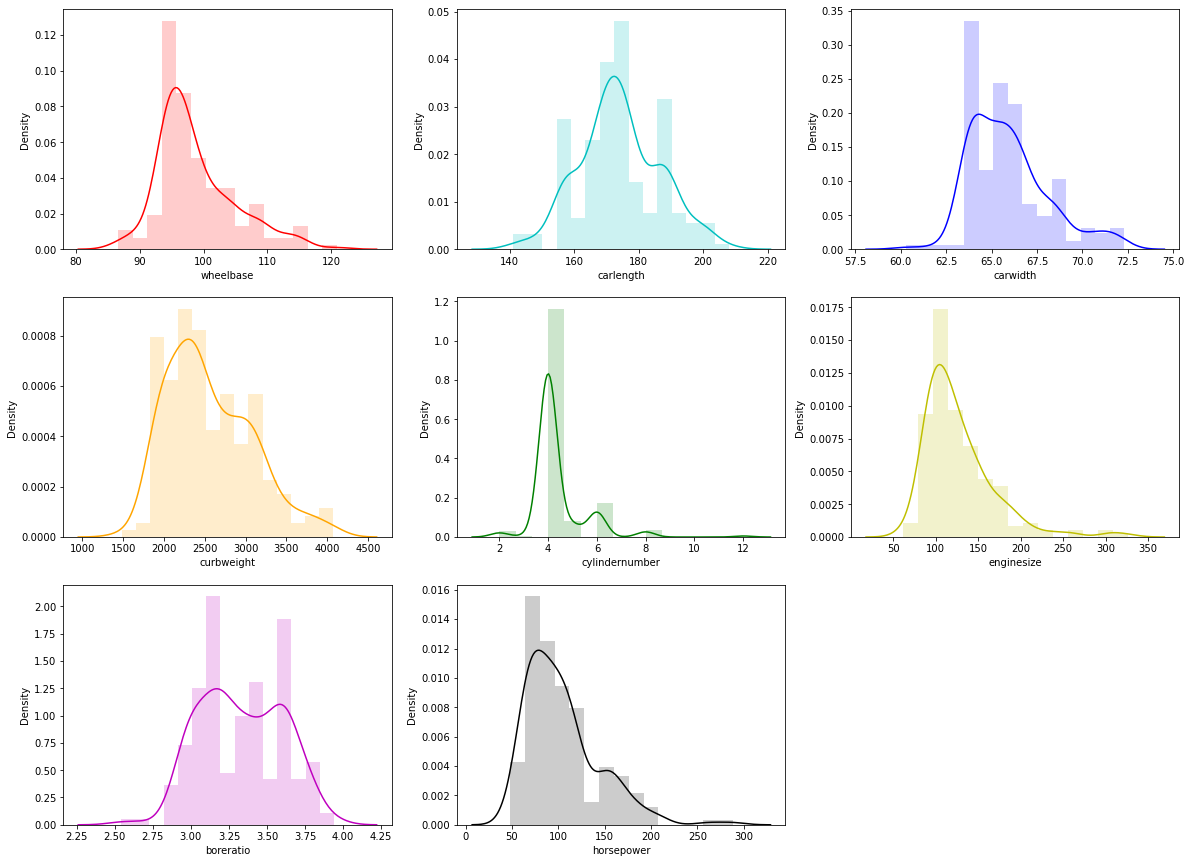

In [25]:
plt.figure(figsize=(20,15))
color=['r','c','b','orange','g','y','m','k']

for i in range(0,8):
    plt.subplot(3,3,i+1)
    sns.distplot(df[num_col[i]],color=color[i],bins=15,hist_kws={'alpha':0.2})
    
plt.show()

Almost all continuous features are following Bell Shape.

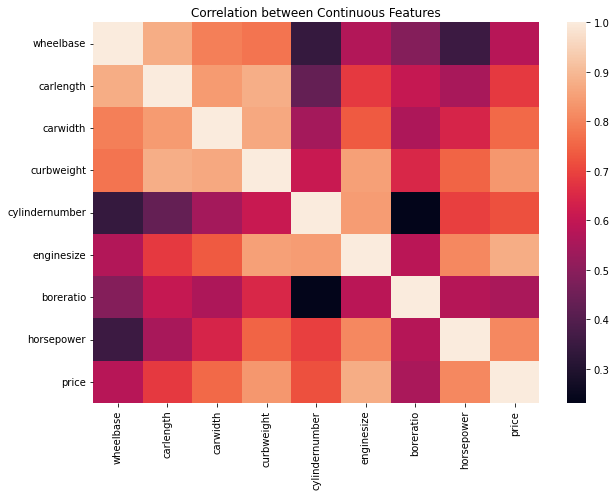

In [26]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr())
plt.title('Correlation between Continuous Features');

In [27]:
df.head()

,company,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price
0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111,13495.0
1,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,2548,dohc,4,130,mpfi,3.47,111,16500.0
2,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,2823,ohcv,6,152,mpfi,2.68,154,16500.0
3,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,2337,ohc,4,109,mpfi,3.19,102,13950.0
4,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,2824,ohc,5,136,mpfi,3.19,115,17450.0


In [28]:
df.shape

(205, 17)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         205 non-null    object 
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   enginelocation  205 non-null    object 
 6   wheelbase       205 non-null    float64
 7   carlength       205 non-null    float64
 8   carwidth        205 non-null    float64
 9   curbweight      205 non-null    int64  
 10  enginetype      205 non-null    object 
 11  cylindernumber  205 non-null    int64  
 12  enginesize      205 non-null    int64  
 13  fuelsystem      205 non-null    object 
 14  boreratio       205 non-null    float64
 15  horsepower      205 non-null    int64  
 16  price           205 non-null    float64
dtypes: float64(5), int64(4), object(8)


In [30]:
df.shape

(205, 17)

**One Hot Encoding:-**

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric. Hence categorical data is converted to a numerical form by performing One Hot Encoding.

In [31]:
cat_col

Index(['company', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem'],
      dtype='object')

In [32]:
for i in range(len(cat_col)):
    df_dummy = pd.get_dummies(df[cat_col[i]])
    df = pd.concat([df, df_dummy], axis = 1)
    df.drop(cat_col[i], axis = 1, inplace=True)

In [33]:
df.shape

(205, 60)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wheelbase       205 non-null    float64
 1   carlength       205 non-null    float64
 2   carwidth        205 non-null    float64
 3   curbweight      205 non-null    int64  
 4   cylindernumber  205 non-null    int64  
 5   enginesize      205 non-null    int64  
 6   boreratio       205 non-null    float64
 7   horsepower      205 non-null    int64  
 8   price           205 non-null    float64
 9   alfa-romero     205 non-null    uint8  
 10  audi            205 non-null    uint8  
 11  bmw             205 non-null    uint8  
 12  buick           205 non-null    uint8  
 13  chevrolet       205 non-null    uint8  
 14  dodge           205 non-null    uint8  
 15  honda           205 non-null    uint8  
 16  isuzu           205 non-null    uint8  
 17  jaguar          205 non-null    uin

As there is no any non-numeric data is present in our dataframe, we can build our model.

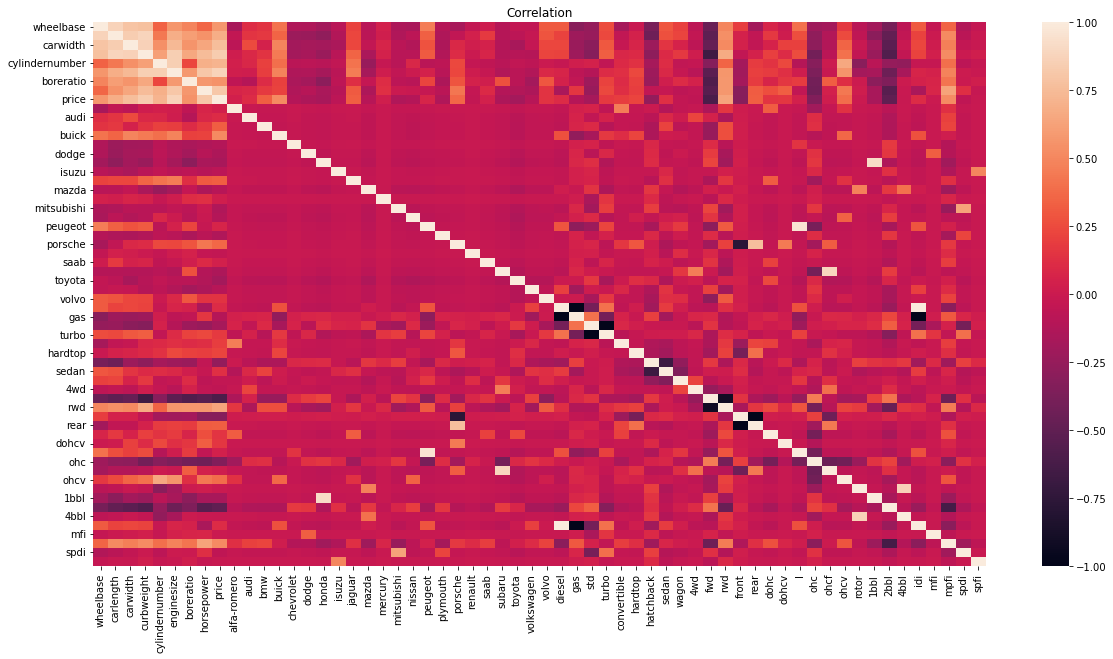

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())
plt.title('Correlation');

In [36]:
cols_to_scale=df.select_dtypes(include=['int64', 'float64']).columns
cols_to_scale

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'horsepower', 'price'],
      dtype='object')

Scaling is required for above mentioned columns in order to convert numerical data between the range 0-1. 

Scaling is performed by using MinMaxScaler.

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
for col in cols_to_scale:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))


## Splitting Dataset

In [38]:
from sklearn.model_selection import train_test_split
X=df.drop(columns='price')
y=df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)


The datset is split in the ratio of 7:3 for training and testing.

Training Dataset:- X_train, y_train

Testing Dataset:- X_test, y_test

In [39]:
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (164, 59)
y_train :  (164,)
X_test :  (41, 59)
y_test :  (41,)


## Model Building

## Linear Regression 

In [40]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
y_pred=lr.predict(X_test)

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8781802388576059

R2 score of 0.88 is in acceptable range.

In [45]:
print('Model intercept: ', lr.intercept_)
print('Model coefficients: ', lr.coef_)

Model intercept:  0.16790644263904583
Model coefficients:  [ 1.57090219e-01 -1.36765242e-01  1.93107527e-01  2.34370452e-01
 -3.73994526e-01  5.62679250e-01 -1.48159573e-01  1.71401241e-01
 -5.22887023e-02  2.43188405e-02  2.40630661e-01  1.34296173e-01
  4.30850139e-02 -5.89271681e-02 -2.79331370e-02 -4.68891473e-03
  3.34577044e-02 -1.35303860e-02  6.93889390e-17 -8.11182098e-02
 -3.96657549e-02 -7.31050043e-02 -6.17535639e-02  1.69824367e-01
 -8.24548657e-02  8.82883424e-03 -7.72344896e-02 -4.91782092e-02
 -4.49852947e-02  1.24221060e-02 -2.82667739e-03  2.82667739e-03
 -9.17670482e-03  9.17670482e-03  7.13594610e-02  2.39018765e-03
 -3.48899117e-02 -9.69734078e-03 -2.91623962e-02  6.89480872e-03
  8.32749491e-03 -1.52223036e-02 -9.40027312e-02  9.40027312e-02
 -1.51247036e-03  0.00000000e+00 -3.00199904e-02 -3.88112753e-02
  1.67682417e-02  2.86811395e-02  2.48943549e-02 -1.64761072e-03
  1.50750434e-02  2.48943549e-02 -2.82667739e-03 -4.47405371e-02
  9.65295830e-03 -4.07531335e-0

**Prediction:-**

In [46]:
y_pred1 = pd.DataFrame(y_pred, columns=['Estimated_Price'])
y_pred1.head()

,Estimated_Price
0,0.098351
1,0.284558
2,0.149111
3,0.177942
4,0.706932


In [47]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,price
0,0.118589
1,0.323519
2,0.140931
3,0.166998
4,0.766645


**Concating Actual and Estimated car prices:-**

In [48]:
Comparison = pd.concat([y_test1, y_pred1], axis=1)
Comparison


,price,Estimated_Price
0,0.118589,0.098351
1,0.323519,0.284558
2,0.140931,0.149111
3,0.166998,0.177942
4,0.766645,0.706932
5,0.083834,0.183950
6,0.029219,0.105140
7,0.159649,0.158198
8,0.072985,0.021701
9,0.430763,0.347821


**Visualization of Actual and Predicted Car Prices:-**

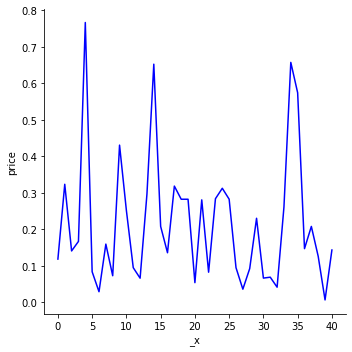

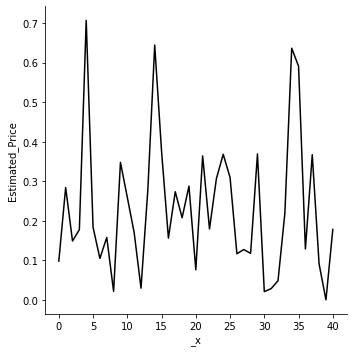

In [51]:
sns.relplot(x=np.arange(41),y='price',data=Comparison,kind='line',color='b')
sns.relplot(x=np.arange(41),y='Estimated_Price',data=Comparison,kind='line',color='k')
plt.show()

**Comparison between Actual and Predicted Car Prices:-**

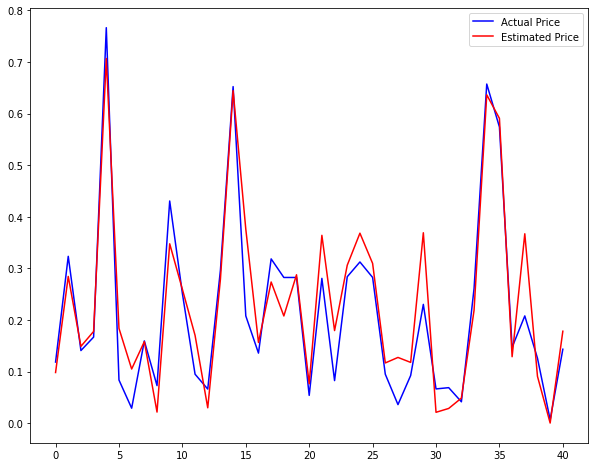

In [56]:
plt.figure(figsize=(10,8))
x=np.arange(41)
y=Comparison['price']
z=Comparison['Estimated_Price']
plt.plot(x,y,color='b',label='Actual Price')
plt.plot(x,z,color='r',label='Estimated Price')
plt.legend()
plt.show()

**As both the actual and predicted curves are almost coinciding, we can say that the built regression model performed well.**